# Proyecto Statistical Learning I

In [ ]:
import helpers.RegresionLineal as rl
import numpy as np
import pandas as pd
import random

### Importación data

In [2]:
data = np.load("./data/proyecto_training_data.npy")
data = pd.DataFrame(data, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd',
                         'YearBuilt', 'LotFrontage'])

data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Regresión Lineal

##### Creación del objeto

In [3]:
regresion = rl.RegresionLineal(data, "SalePrice")

#### Análisis exploratorio

In [4]:
regresion.AnalisisExploratorio()

           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   180921.195890     6.099315  1162.626712      6.517808  1971.267808   
std     79442.502883     1.382997   386.587738      1.625393    30.202904   
min     34900.000000     1.000000   334.000000      2.000000  1872.000000   
25%    129975.000000     5.000000   882.000000      5.000000  1954.000000   
50%    163000.000000     6.000000  1087.000000      6.000000  1973.000000   
75%    214000.000000     7.000000  1391.250000      7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000     14.000000  2010.000000   

       LotFrontage  
count  1201.000000  
mean     70.049958  
std      24.284752  
min      21.000000  
25%      59.000000  
50%      69.000000  
75%      80.000000  
max     313.000000  


#### Histogramas

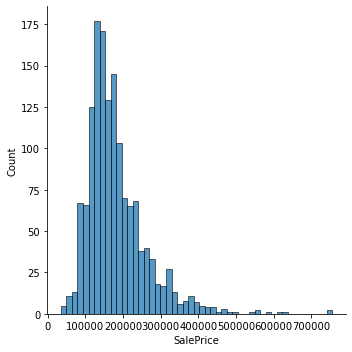

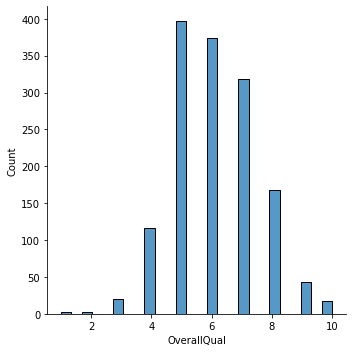

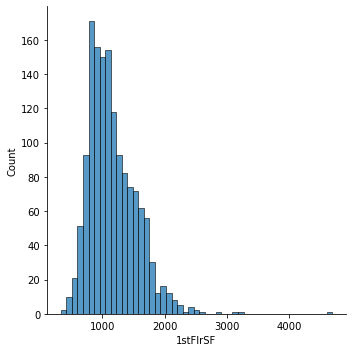

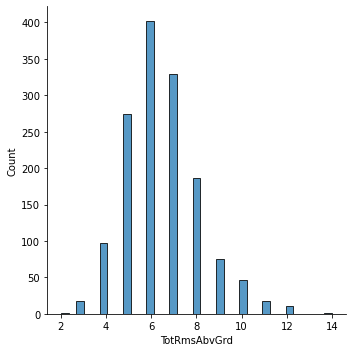

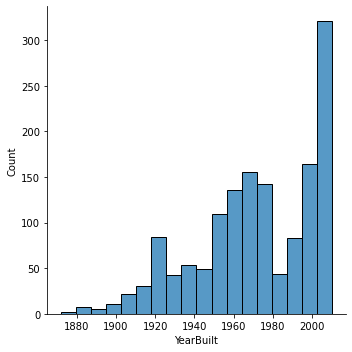

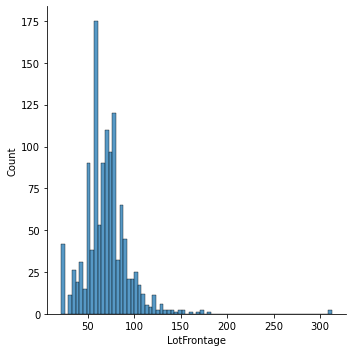

In [5]:
regresion.GenerarHistogramas()

#### Análisis Variables Independientes

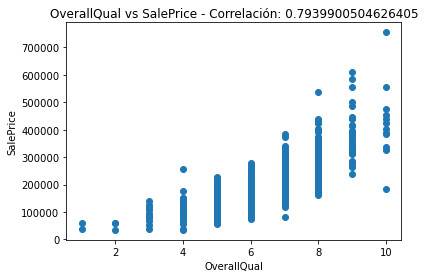

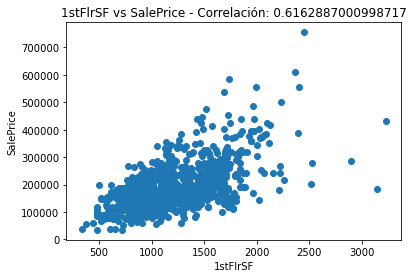

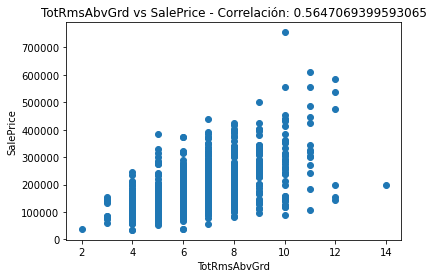

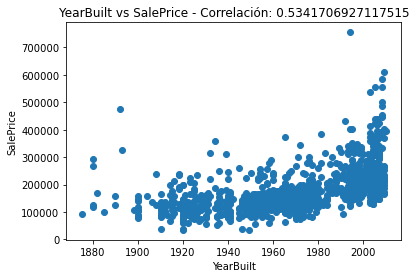

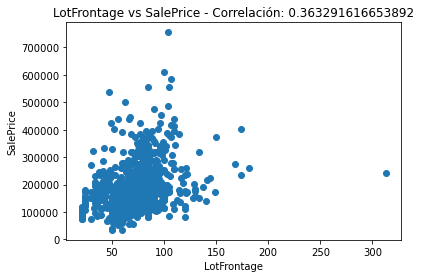

In [6]:
regresion.AnalisisVariablesIndependientes()

##### Selección de variables
- Utilizando la correlación para la selección de variables, se obtiene que las 2 variables con la mejor correlación son: OverallQual y 1stFlrSF

In [7]:
variable1 = "OverallQual"
variable2 = "1stFlrSF"

#### Entrenamiento manual del modelo

##### OverallQual

In [8]:
modelosVariable1, erroresVariable1 = regresion.Entrenar(regresion.ObtenerColumna(regresion.target),regresion.ObtenerColumna(variable1), 10000, 1000, 0.0001)

Iteración = 0, Error = 19409722053.22175
Iteración = 1000, Error = 3854944519.1738305
Iteración = 2000, Error = 3842849631.039447
Iteración = 3000, Error = 3835877874.153663
Iteración = 4000, Error = 3828973454.4092097
Iteración = 5000, Error = 3822134107.965952
Iteración = 6000, Error = 3815359220.991011
Iteración = 7000, Error = 3808648185.9666677
Iteración = 8000, Error = 3802000401.101088
Iteración = 9000, Error = 3795415270.274219


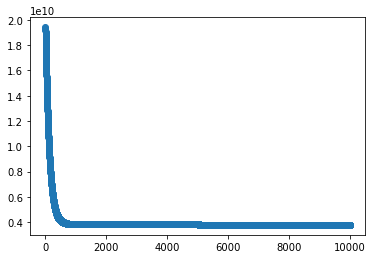

In [9]:
regresion.VisualizacionError(erroresVariable1)

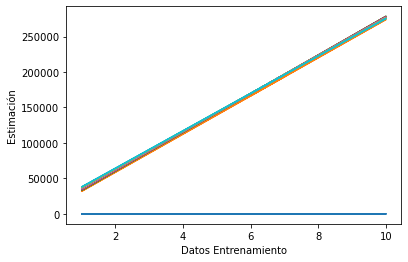

Datos entrenamiento

        0
0     7.0
1     6.0
2     7.0
3     7.0
4     8.0
...   ...
1163  4.0
1164  5.0
1165  7.0
1166  8.0
1167  6.0

[1168 rows x 1 columns]
Fin Datos entrenamiento


In [10]:
regresion.VisualizacionDelModelo(modelosVariable1, 1000, variable1)

##### 1stFlrSF

In [11]:
modelosVariable2, erroresVariable2 = regresion.Entrenar(regresion.ObtenerColumna(regresion.target),regresion.ObtenerColumna(variable2), 10000, 1000, 0.0000001)

Iteración = 0, Error = 19409722053.22175
Iteración = 1000, Error = 4644734389.980001
Iteración = 2000, Error = 4644705247.4735155
Iteración = 3000, Error = 4644676105.517997
Iteración = 4000, Error = 4644646964.1134405
Iteración = 5000, Error = 4644617823.259834
Iteración = 6000, Error = 4644588682.957166
Iteración = 7000, Error = 4644559543.205426
Iteración = 8000, Error = 4644530404.004607
Iteración = 9000, Error = 4644501265.3546915


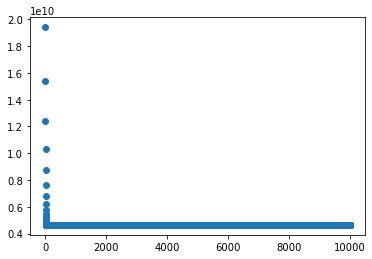

In [12]:
regresion.VisualizacionError(erroresVariable2)

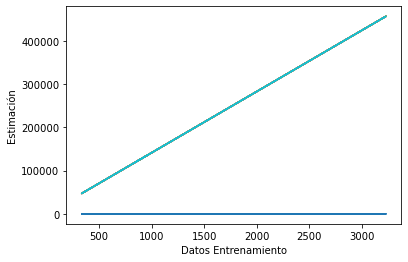

Datos entrenamiento

           0
0      856.0
1     1262.0
2      920.0
3      961.0
4     1145.0
...      ...
1163  1258.0
1164  1432.0
1165  1502.0
1166  1694.0
1167   959.0

[1168 rows x 1 columns]
Fin Datos entrenamiento


In [13]:
regresion.VisualizacionDelModelo(modelosVariable2, 1000, variable2)

#### Selección modelo entrenado manualmente

In [14]:
modeloVariable1 = regresion.SeleccionarModelo(modelosVariable1, erroresVariable1)
print(f"Beta 0: {modeloVariable1[1]} ; Beta 1: {modeloVariable1[0]}")

Beta 0: 12449.95187595909 ; Beta 1: 26254.483883439716


In [15]:
modeloVariable2 = regresion.SeleccionarModelo(modelosVariable2, erroresVariable2)
print(f"Beta 0: {modeloVariable2[1]} ; Beta 1: {modeloVariable2[0]}")

Beta 0: 17.179633779129503 ; Beta 1: 141.39925347923457


#### Entrenamiento Sklearn

In [16]:
modeloSklearnVariable1 = regresion.EntrenarSklearn(variable1)
print("beta 1:")
print(modeloSklearnVariable1.coef_)
print("beta 0:")
print(modeloSklearnVariable1.intercept_)

beta 1:
[[45411.99877916]]
beta 0:
[-96469.57131874]


In [17]:
modeloSklearnVariable2 = regresion.EntrenarSklearn(variable2)
print("beta 1:")
print(modeloSklearnVariable2.coef_)
print("beta 0:")
print(modeloSklearnVariable2.intercept_)

beta 1:
[[129.95124229]]
beta 0:
[30324.58517496]


##### Predicciones

In [18]:
prediccionManual1, prediccionSklearn1, prediccionPromedio1 = regresion.Predicciones(modeloVariable1, modeloSklearnVariable1, random.sample(range(10), 10))

In [19]:
print("Predicicón Modelo Manual")
print(prediccionManual1)
print("Predicicón Modelo Sklearn")
print(prediccionSklearn1)
print("Predicicón Promedio")
print(prediccionPromedio1)

Predicicón Modelo Manual
[[248740.30682692]
 [117467.88740972]
 [169976.8551766 ]
 [143722.37129316]
 [196231.33906004]
 [ 91213.40352628]
 [ 64958.91964284]
 [ 38704.4357594 ]
 [222485.82294348]
 [ 12449.95187596]]
Predicicón Modelo Sklearn
[[312238.41769369]
 [ 85178.4237979 ]
 [176002.42135622]
 [130590.42257706]
 [221414.42013537]
 [ 39766.42501874]
 [ -5645.57376042]
 [-51057.57253958]
 [266826.41891453]
 [-96469.57131874]]
Predicicón Promedio
[[280489.3622603 ]
 [101323.15560381]
 [172989.63826641]
 [137156.39693511]
 [208822.87959771]
 [ 65489.91427251]
 [ 29656.67294121]
 [ -6176.56839009]
 [244656.12092901]
 [-42009.80972139]]


In [20]:
prediccionManual2, prediccionSklearn2, prediccionPromedio2 = regresion.Predicciones(modeloVariable2, modeloSklearnVariable1, random.sample(range(800,4000), 10))

In [21]:
print("Predicicón Modelo Manual")
print(prediccionManual2)
print("Predicicón Modelo Sklearn")
print(prediccionSklearn2)
print("Predicicón Promedio")
print(prediccionPromedio2)

Predicicón Modelo Manual
[[444859.23107945]
 [421528.35425538]
 [334850.61187261]
 [195572.34719556]
 [192461.56361902]
 [230497.96280493]
 [348283.54095313]
 [213530.05238742]
 [497459.75337373]
 [362423.46630106]]
Predicicón Modelo Sklearn
[[1.42769679e+08]
 [1.35276699e+08]
 [1.07439144e+08]
 [6.27083247e+07]
 [6.17092608e+07]
 [7.39250884e+07]
 [1.11753283e+08]
 [6.84756486e+07]
 [1.59662942e+08]
 [1.16294483e+08]]
Predicicón Promedio
[[71607268.90949771]
 [67849113.57180505]
 [53886997.07480137]
 [31451948.54372697]
 [30950861.16536795]
 [37077793.2007578 ]
 [56050783.48135169]
 [34344589.3187995 ]
 [80080200.94356844]
 [58328453.38298361]]


### Test

#### OverallQual

##### Modelo Entrenado Manualmente

In [22]:
modeloVariable1

[26254.483883439716, 12449.95187595909]

[26254.483883439716, 12449.95187595909]


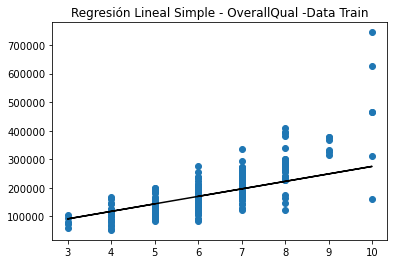

In [23]:
erroresTest1 = regresion.PrediccionesTest(variable1, modeloVariable1)

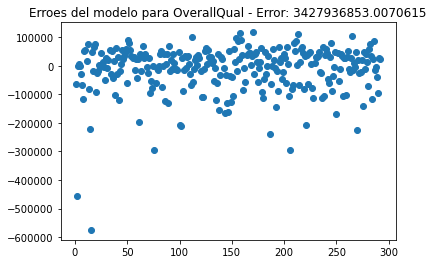

In [24]:
regresion.VisualizacionErrorTest(variable1, erroresTest1)

##### Modelo Sklearn

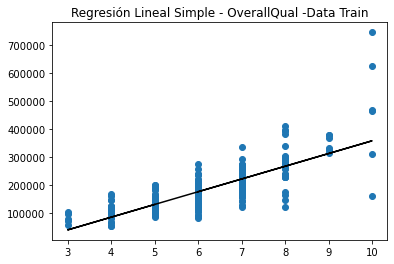

In [25]:
erroresTest1Sklearn = regresion.PrediccionesTestSklearn(variable1, modeloSklearnVariable1)

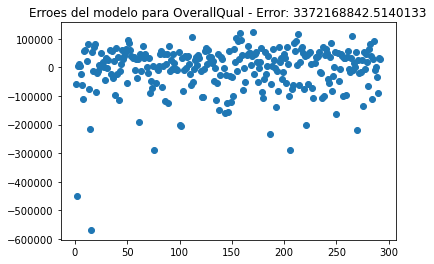

In [26]:
regresion.VisualizacionErrorTest(variable1, erroresTest1Sklearn)

#### 1stFlrSF

##### Modelo Entrenado Manualmente

[141.39925347923457, 17.179633779129503]


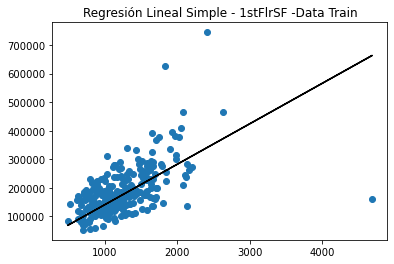

In [27]:
erroresTest2 = regresion.PrediccionesTest(variable2, modeloVariable2)

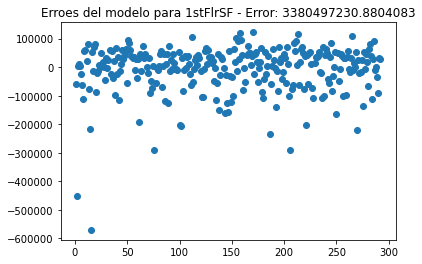

In [28]:
regresion.VisualizacionErrorTest(variable2, erroresTest2)

##### Modelo Sklearn

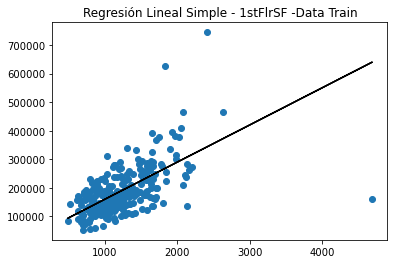

In [29]:
erroresTest2Sklearn = regresion.PrediccionesTestSklearn(variable2, modeloSklearnVariable2)

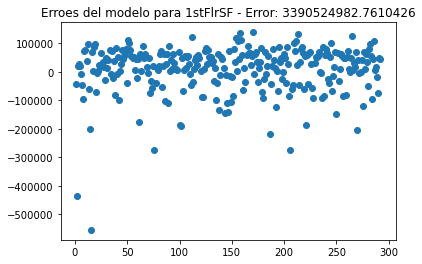

In [30]:
regresion.VisualizacionErrorTest(variable2, erroresTest2Sklearn)

### Conclusión

Para la variable el OverallQual el mejor modelo es el de Sklearn, para la varaible 1stFlrSF el mejor modelo es el entrenanamo manualmente. Esta desición tomada con el criterio de escoger el modelo que produce el menor error.